
let's start with TensorFlow.


---


In this collab, we are goig to solve three problems, and create thre different neuronal nets.


## First Sample. The most simple problem to solve 

---




In [4]:
#First steep is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
print (tf.__version__)


2.8.2


In [5]:
#create 2 arrays, and the model must discover the relationship betwen the values. 
# (n * -1) + 2
X = np.array([-2.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype=float)
y = np.array([4.0, 3.0, 2.0, 1.0, 0.0, -1.0, -2.0, -3.0, -4.0, -5.0, -6.0], dtype=float)

In [6]:
#Model with just one dense layer, one neuron, and one input. This is the most simple model possible. 
model = tf.keras.Sequential(keras.layers.Dense(units=1, input_shape=[1]))


In [7]:
#compile and train the model.
#compile and indicate the optimezer and the model. By the moment we need to understand that this both functions are where the magic happens. 
#The optimizer is the function responsible to make a guess. 
#The loss function is responsible to indicate how accurated the guees is. 
#They try to be more accurated in each epoch
model.compile(optimizer="sgd", loss="mean_squared_error") 
model.fit(X, y, epochs=250)

Epoch 1/250
1/1 [==============================] - 2s 2s/step - loss: 11.0837
Epoch 2/250
1/1 [==============================] - 0s 9ms/step - loss: 5.2700
Epoch 3/250
1/1 [==============================] - 0s 7ms/step - loss: 3.0815
Epoch 4/250
1/1 [==============================] - 0s 8ms/step - loss: 2.2436
Epoch 5/250
1/1 [==============================] - 0s 7ms/step - loss: 1.9092
Epoch 6/250
1/1 [==============================] - 0s 9ms/step - loss: 1.7627
Epoch 7/250
1/1 [==============================] - 0s 10ms/step - loss: 1.6867
Epoch 8/250
1/1 [==============================] - 0s 6ms/step - loss: 1.6374
Epoch 9/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5984
Epoch 10/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5637
Epoch 11/250
1/1 [==============================] - 0s 5ms/step - loss: 1.5310
Epoch 12/250
1/1 [==============================] - 0s 5ms/step - loss: 1.4994
Epoch 13/250
1/1 [==============================] - 0s 6ms/s

In [8]:
#expect something near -8. 
print(model.predict([10.0]))

[[-7.9107337]]


# Working with Images
Dataset:
This dataset is really common and used in a los of samples and tutorials. 
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip

References: 

This is an amazing article, using Keras, but not with Tensorflow. I got a lot of information and inspiration from this articles. For sure that anyone able to follow this course can understand and get ideas. 

https://machinelearningmastery.com/how-to-develop-a-convolutional-neural-network-to-classify-photos-of-dogs-and-cats/

Maybe the best introduction to Machine Learning with tensorflow is the list from Laurence Moroney available in youtube. I get a lot from the video number 5, to create this sample. 
https://www.youtube.com/watch?v=nq7_ZYJPWf0&t=5s


As you can see all the aproches are similar, but not the same. Is easy to copy one model who works with the same dataset, but you must understand what are you doing and experiment by yourself. 

In [9]:
#First step is import the libraries. 
import tensorflow as tf
#Numpy is a lybrary that allow us to work with arrays. 
import numpy as np
#keras is an open source neural networks lybrary writted in python that run's in varios frameworks, TensorFlow included. 
from tensorflow import keras
from time import time

print (tf.__version__)


2.8.2


In [10]:
gEpochs=10

In [11]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo-', label='Training accuracy')
  plt.plot(epochs, val_acc, 'go-', label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.figure()

  plt.plot(epochs, loss, 'bo-', label='Training Loss')
  plt.plot(epochs, val_loss, 'go-', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

In [12]:
#obtain the data from microsoft.com
#the same dataset is available in kaggle but with a different organization
#https://www.kaggle.com/competitions/dogs-vs-cats/data

!wget --no-check-certificate \
https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip \-O /tmp/catsvsdogs.zip



--2022-07-14 05:49:47--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 92.123.124.137, 2a02:26f0:6b:5a5::e59, 2a02:26f0:6b:5b3::e59
Connecting to download.microsoft.com (download.microsoft.com)|92.123.124.137|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/catsvsdogs.zip’

/tmp/catsvsdogs.zip 100%[===================>] 786.67M   127MB/s    in 6.2s    

2022-07-14 05:49:54 (127 MB/s) - ‘/tmp/catsvsdogs.zip’ saved [824887076/824887076]



In [13]:
#unzip the data
import zipfile
cvr_zip_file = '/tmp/catsvsdogs.zip'
zipmem = zipfile.ZipFile(cvr_zip_file)
zipmem.extractall('/tmp/catsvsdogs')
zipmem.close()



In [14]:
#create the directory structure
import os

#we need a try block, because it fails when the directories already exist. 
try:
  os.mkdir('/tmp/datacvd')
  os.mkdir('/tmp/datacvd/train')
  os.mkdir('/tmp/datacvd/validation')
  os.mkdir('/tmp/datacvd/train/cats')
  os.mkdir('/tmp/datacvd/train/dogs')
  os.mkdir('/tmp/datacvd/validation/cats')
  os.mkdir('/tmp/datacvd/validation/dogs')
except:
  pass

In [15]:
#we need 4 datasets, two for training the model and two for validate or test the model. 
#to classify the images in this dataset we can move it from their original directories to 
#a new ones with the correct structure. 

from shutil import copyfile

#this array contents all the images to move/copy
imagesCats=[]
imagesDogs=[]

for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Cat/'):
  imageCat = '/tmp/catsvsdogs/PetImages/Cat/' + imagename
  if (os.path.getsize(imageCat)) > 0:
    imagesCats.append(imagename)


for imagename in os.listdir('/tmp/catsvsdogs/PetImages/Dog/'):
  imageDog = '/tmp/catsvsdogs/PetImages/Dog/' + imagename
  if (os.path.getsize(imageDog)) > 0:
    imagesDogs.append(imagename)




counterImage = 0
for imagename in imagesCats:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/validation/cats/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Cat/' + imagename, '/tmp/datacvd/train/cats/'+imagename)
  counterImage +=1

counterImage = 0
for imagename in imagesDogs:
  if  counterImage < 2000:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/validation/dogs/'+imagename)
  else:
    copyfile('/tmp/catsvsdogs/PetImages/Dog/' + imagename, '/tmp/datacvd/train/dogs/'+imagename)
  counterImage +=1

print(len(os.listdir('/tmp/datacvd/validation/dogs/')))
print(len(os.listdir('/tmp/datacvd/train/dogs/')))
print(len(os.listdir('/tmp/datacvd/validation/cats/')))
print(len(os.listdir('/tmp/datacvd/train/cats/')))


2000
10500
2000
10500


In [16]:
#create the model
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])


In [17]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 85264)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               10913920  
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10,914,833
Trainable params: 10,914,833
Non-trainable params: 0
__________________________________________

In [18]:
 #create the model2
#a model with more convutionals and Pooling layers obtains leess parameters. 
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [19]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 147, 147, 16)      784       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 70, 70, 32)        8224      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        32832     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 64)      

In [20]:
#compile models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
model.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
model2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [21]:
#preparing the images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [22]:
#Training the model
#epochs * steps_per_epoch * batch_size

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)

Epoch 1/10
159/200 [======================>.......] - ETA: 11s - loss: 1.3129 - accuracy: 0.6110

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 78s 344ms/step - loss: 1.1660 - accuracy: 0.6263 - val_loss: 0.5906 - val_accuracy: 0.7010
Epoch 2/10
200/200 [==============================] - 68s 340ms/step - loss: 0.5308 - accuracy: 0.7417 - val_loss: 0.5429 - val_accuracy: 0.7358
Epoch 3/10
200/200 [==============================] - 68s 342ms/step - loss: 0.4492 - accuracy: 0.7923 - val_loss: 0.5329 - val_accuracy: 0.7402
Epoch 4/10
200/200 [==============================] - 67s 335ms/step - loss: 0.3697 - accuracy: 0.8432 - val_loss: 0.5944 - val_accuracy: 0.7310
Epoch 5/10
200/200 [==============================] - 67s 333ms/step - loss: 0.2870 - accuracy: 0.8840 - val_loss: 0.6124 - val_accuracy: 0.7405
Epoch 6/10
200/200 [==============================] - 67s 335ms/step - loss: 0.2044 - accuracy: 0.9241 - val_loss: 0.7162 - val_accuracy: 0.7405
Epoch 7/10
200/200 [==============================] - 67s 333ms/step - loss: 0.1465 - accuracy: 0.9525 - val_loss: 0.7530 - val_accuracy: 0.7

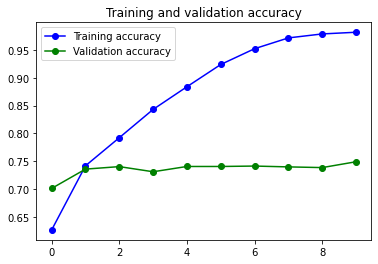

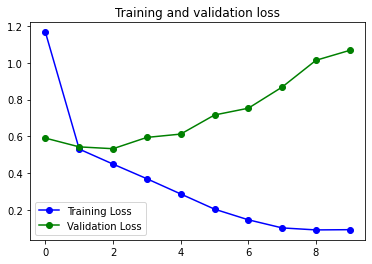

In [23]:
plot_loss_acc(history)

In [24]:
#Training the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)

Epoch 1/10
 68/200 [=========>....................] - ETA: 38s - loss: 0.7661 - accuracy: 0.5490

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 69s 341ms/step - loss: 0.6773 - accuracy: 0.6182 - val_loss: 0.5495 - val_accuracy: 0.7305
Epoch 2/10
200/200 [==============================] - 68s 340ms/step - loss: 0.5310 - accuracy: 0.7403 - val_loss: 0.4919 - val_accuracy: 0.7558
Epoch 3/10
200/200 [==============================] - 67s 335ms/step - loss: 0.4590 - accuracy: 0.7846 - val_loss: 0.4211 - val_accuracy: 0.8095
Epoch 4/10
200/200 [==============================] - 67s 336ms/step - loss: 0.4001 - accuracy: 0.8190 - val_loss: 0.4137 - val_accuracy: 0.8127
Epoch 5/10
200/200 [==============================] - 68s 341ms/step - loss: 0.3416 - accuracy: 0.8515 - val_loss: 0.3901 - val_accuracy: 0.8285
Epoch 6/10
200/200 [==============================] - 67s 336ms/step - loss: 0.2827 - accuracy: 0.8795 - val_loss: 0.4511 - val_accuracy: 0.7872
Epoch 7/10
200/200 [==============================] - 67s 337ms/step - loss: 0.2140 - accuracy: 0.9141 - val_loss: 0.8103 - val_accuracy: 0.7

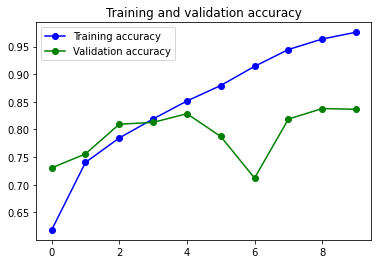

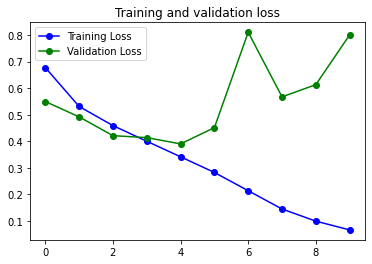

In [25]:

plot_loss_acc(history2)

## Solve OVERFITTING with Image Augmentation
Image augmentation add variations to the images reducing the overfitting. 





In [26]:
#preparing the images but using random movements to obtain images from 
#image augmentation applied only to train data generator. 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
#TRAIN Dataset
#Normalize the images
train_idg = ImageDataGenerator(rescale=1/255, 
                               rotation_range=20, 
                               width_shift_range=0.1, 
                               height_shift_range=0.1, 
                               shear_range=0.2, 
                               zoom_range=0.1, 
                               horizontal_flip=True)
train_data = train_idg.flow_from_directory(
    '/tmp/datacvd/train', 
    target_size = (150, 150), 
    batch_size = 105, 
    class_mode='binary'
)
#VALIDATION Dataset
val_idg = ImageDataGenerator(rescale=1/255)
val_data = val_idg.flow_from_directory(
    '/tmp/datacvd/validation', 
    target_size = (150, 150), 
    batch_size = 100, 
    class_mode='binary'
)

Found 20998 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [27]:
#Training the model
#with the new imagegenerator

history = model.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)

Epoch 1/10
184/200 [==========================>...] - ETA: 11s - loss: 0.6021 - accuracy: 0.7039

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 149s 748ms/step - loss: 0.5971 - accuracy: 0.7058 - val_loss: 0.5213 - val_accuracy: 0.7645
Epoch 2/10
200/200 [==============================] - 149s 746ms/step - loss: 0.5711 - accuracy: 0.7137 - val_loss: 0.5114 - val_accuracy: 0.7548
Epoch 3/10
200/200 [==============================] - 148s 743ms/step - loss: 0.5575 - accuracy: 0.7250 - val_loss: 0.5389 - val_accuracy: 0.7370
Epoch 4/10
200/200 [==============================] - 149s 745ms/step - loss: 0.5477 - accuracy: 0.7285 - val_loss: 0.5040 - val_accuracy: 0.7720
Epoch 5/10
200/200 [==============================] - 150s 748ms/step - loss: 0.5464 - accuracy: 0.7243 - val_loss: 0.5583 - val_accuracy: 0.7663
Epoch 6/10
200/200 [==============================] - 148s 740ms/step - loss: 0.5385 - accuracy: 0.7372 - val_loss: 0.5440 - val_accuracy: 0.7685
Epoch 7/10
200/200 [==============================] - 150s 750ms/step - loss: 0.5337 - accuracy: 0.7376 - val_loss: 0.5231 - val_accura

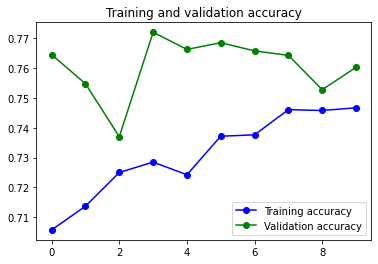

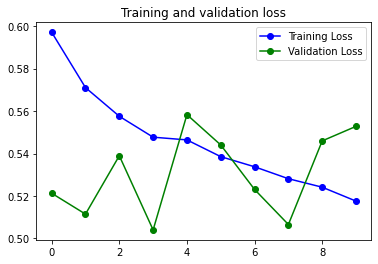

In [28]:
plot_loss_acc(history)

In [29]:
#Traning the model2
history2 = model2.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)

Epoch 1/10
108/200 [===============>..............] - ETA: 1:05 - loss: 0.4800 - accuracy: 0.7842

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 152s 760ms/step - loss: 0.4571 - accuracy: 0.7936 - val_loss: 0.3511 - val_accuracy: 0.8528
Epoch 2/10
200/200 [==============================] - 151s 756ms/step - loss: 0.4163 - accuracy: 0.8143 - val_loss: 0.3512 - val_accuracy: 0.8528
Epoch 3/10
200/200 [==============================] - 151s 753ms/step - loss: 0.3987 - accuracy: 0.8214 - val_loss: 0.3233 - val_accuracy: 0.8708
Epoch 4/10
200/200 [==============================] - 152s 758ms/step - loss: 0.3837 - accuracy: 0.8307 - val_loss: 0.3198 - val_accuracy: 0.8717
Epoch 5/10
200/200 [==============================] - 151s 757ms/step - loss: 0.3741 - accuracy: 0.8382 - val_loss: 0.2813 - val_accuracy: 0.8845
Epoch 6/10
200/200 [==============================] - 150s 751ms/step - loss: 0.3527 - accuracy: 0.8458 - val_loss: 0.2868 - val_accuracy: 0.8852
Epoch 7/10
200/200 [==============================] - 151s 756ms/step - loss: 0.3488 - accuracy: 0.8485 - val_loss: 0.2978 - val_accura

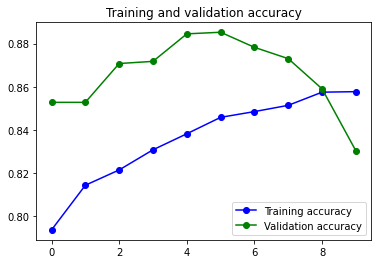

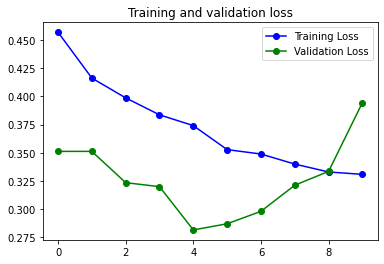

In [30]:
plot_loss_acc(history2)

### Add a some dropout layers to the models
A dropout layer can help with the overfitting reducing the amount of information in every image. 

In [31]:
#create the model with a dropout layer. 
#it's a minimal model for images, with just an Convolutionatl layer and a MaxPooling layer
modelDrop1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(128, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [40]:
 #create the model with dropouts layers. 
#a model with more convutionals and Pooling layers obtains leess parameters. 
modelDrop2 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, (4,4), activation="relu", input_shape=(150, 150, 3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Dropout(0.2),   
  tf.keras.layers.Conv2D(32, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Conv2D(64, (4,4), activation="relu"),
  tf.keras.layers.MaxPooling2D(2,2),  
  tf.keras.layers.Dropout(0.5), 
  tf.keras.layers.Flatten(), 
  tf.keras.layers.Dense(512, activation="relu"), 
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [42]:
#compile the dropout models 
from tensorflow.keras.optimizers import RMSprop
#binary_crossentropy is a loss function that works really weel with binary clasifications. 
modelDrop1.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])
modelDrop2.compile(loss="binary_crossentropy", 
              optimizer=RMSprop(learning_rate=0.001), 
              metrics=['accuracy'])

In [34]:
#Training the model
#with the new imagegenerator

historyDrop = modelDrop1.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)

Epoch 1/10
174/200 [=========================>....] - ETA: 18s - loss: 1.0170 - accuracy: 0.5834

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 150s 747ms/step - loss: 0.9674 - accuracy: 0.5921 - val_loss: 0.5985 - val_accuracy: 0.6768
Epoch 2/10
200/200 [==============================] - 149s 747ms/step - loss: 0.6093 - accuracy: 0.6669 - val_loss: 0.5658 - val_accuracy: 0.7100
Epoch 3/10
200/200 [==============================] - 149s 746ms/step - loss: 0.5793 - accuracy: 0.6997 - val_loss: 0.5240 - val_accuracy: 0.7360
Epoch 4/10
200/200 [==============================] - 148s 742ms/step - loss: 0.5633 - accuracy: 0.7129 - val_loss: 0.5181 - val_accuracy: 0.7427
Epoch 5/10
200/200 [==============================] - 149s 744ms/step - loss: 0.5483 - accuracy: 0.7238 - val_loss: 0.5071 - val_accuracy: 0.7477
Epoch 6/10
200/200 [==============================] - 148s 742ms/step - loss: 0.5483 - accuracy: 0.7257 - val_loss: 0.5033 - val_accuracy: 0.7582
Epoch 7/10
200/200 [==============================] - 149s 745ms/step - loss: 0.5460 - accuracy: 0.7282 - val_loss: 0.4855 - val_accura

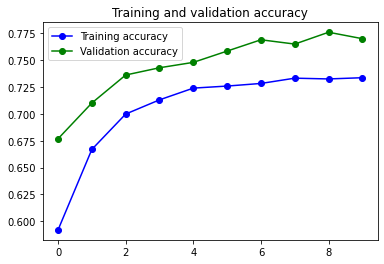

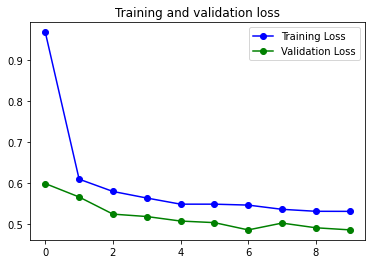

In [43]:
plot_loss_acc(historyDrop)

In [44]:
#Training the model2
start = time()
historyDrop2 = modelDrop2.fit(
     train_data,
     validation_data = val_data, 
     epochs=gEpochs,
     steps_per_epoch=200,
     validation_steps=40,
     verbose=1)
print (time()-start)

Epoch 1/10
178/200 [=========================>....] - ETA: 15s - loss: 0.7553 - accuracy: 0.5453

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

200/200 [==============================] - 155s 770ms/step - loss: 0.7437 - accuracy: 0.5545 - val_loss: 0.6284 - val_accuracy: 0.6522
Epoch 2/10
200/200 [==============================] - 153s 767ms/step - loss: 0.6251 - accuracy: 0.6553 - val_loss: 0.7140 - val_accuracy: 0.6010
Epoch 3/10
200/200 [==============================] - 154s 769ms/step - loss: 0.5806 - accuracy: 0.7016 - val_loss: 0.5047 - val_accuracy: 0.7600
Epoch 4/10
200/200 [==============================] - 153s 765ms/step - loss: 0.5508 - accuracy: 0.7187 - val_loss: 0.4767 - val_accuracy: 0.7835
Epoch 5/10
200/200 [==============================] - 154s 769ms/step - loss: 0.5272 - accuracy: 0.7334 - val_loss: 0.4888 - val_accuracy: 0.7558
Epoch 6/10
200/200 [==============================] - 153s 768ms/step - loss: 0.5093 - accuracy: 0.7517 - val_loss: 0.4219 - val_accuracy: 0.8127
Epoch 7/10
200/200 [==============================] - 153s 767ms/step - loss: 0.4909 - accuracy: 0.7619 - val_loss: 0.4034 - val_accura

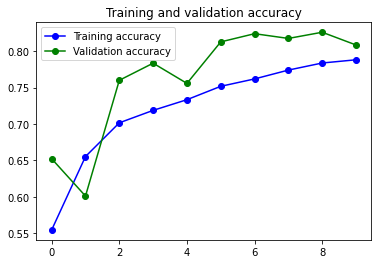

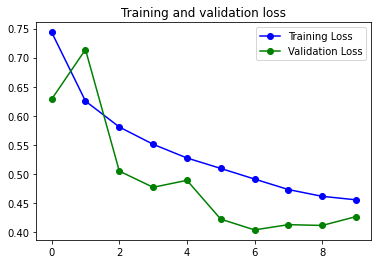

In [46]:
plot_loss_acc(historyDrop2)